In [1]:
import csv
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

from ppdenoise.ppdenoise import ppdenoise

Import a test image that has been corrupted and denoised with the original Julia implementation and compare with the python denoised version.

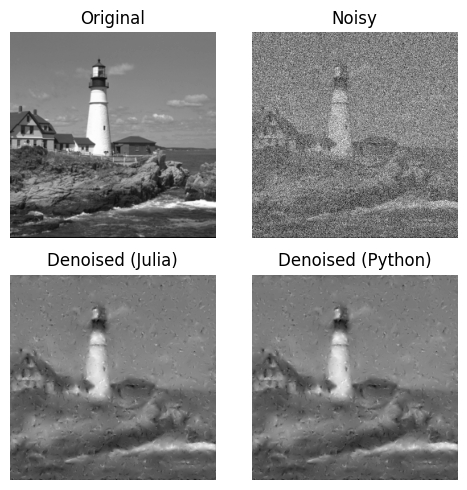

In [2]:
def read_array(csv_path: Path) -> np.ndarray:
    with open(csv_path, 'r') as f:
        reader = csv.reader(f)
        return np.array([[float(el) for el in r] for r in reader])


# Load original image, noisy version, and Julia's denoised version
test_path = Path('test_data')
lighthouse = read_array(test_path / 'lighthouse.csv')
corrupted_lighthouse = read_array(test_path / 'corrupted_lighthouse.csv')
denoised_lighthouse = read_array(test_path / 'denoised_lighthouse.csv')

# Denoise using python version
my_denoised_lighthouse = ppdenoise(corrupted_lighthouse, nscale=6, norient=6, mult=2.5,
                                   minwavelength=2, sigmaonf=0.55, dthetaonsigma=1.0,
                                   k=3, softness=1.0)

# Plot images
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5, 5))
axes[0, 0].imshow(lighthouse, cmap='gray')
axes[0, 0].set_title('Original')
axes[0, 1].imshow(corrupted_lighthouse, cmap='gray')
axes[0, 1].set_title('Noisy')
axes[1, 0].imshow(denoised_lighthouse, cmap='gray')
axes[1, 0].set_title('Denoised (Julia)')
axes[1, 1].imshow(my_denoised_lighthouse, cmap='gray')
axes[1, 1].set_title('Denoised (Python)')
for ax in axes.flatten():
    ax.axis('off')
fig.tight_layout()

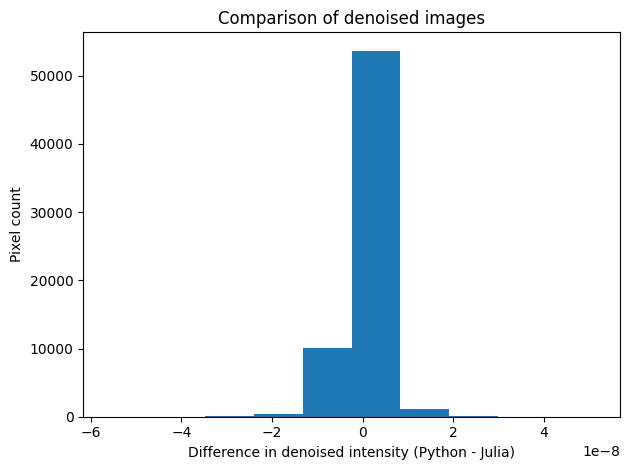

In [3]:
# Histogram of differences
fig, ax = plt.subplots()
ax.hist((my_denoised_lighthouse - denoised_lighthouse).flatten())
ax.set_title('Comparison of denoised images')
ax.set_xlabel('Difference in denoised intensity (Python - Julia)')
ax.set_ylabel('Pixel count')
fig.tight_layout()